zaczytanie niezbędnych bibliotek

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
from sklearn.preprocessing import StandardScaler

zaczytaj dane dotyczace sprzedazy

In [93]:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "/Salary Data (2).csv"

df = pd.read_csv(file_path)

print("First 5 records:", df.head())

df.info()


First 5 records:     Age  Gender Education Level          Job Title  Years of Experience  \
0  32.0    Male      Bachelor's  Software Engineer                  5.0   
1  28.0  Female        Master's       Data Analyst                  3.0   
2  45.0    Male             PhD     Senior Manager                 15.0   
3  36.0  Female      Bachelor's    Sales Associate                  7.0   
4  52.0    Male        Master's           Director                 20.0   

     Salary  
0   90000.0  
1   65000.0  
2  150000.0  
3   60000.0  
4  200000.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    fl

preprocessing

1.   sprawdż typy danych
2.   zmien etykiedy na zmienne liczbowe
3. w przypadku brakujacych danych uzupelnij (w przypadku etykiet) najczesciej wystepującą wartością lub średnią wartością



In [94]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Education Level'] = le.fit_transform(df['Education Level'])
df['Job Title'] = le.fit_transform(df['Job Title'])
df.head()





,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,1,0,159,5.0,90000.0
1,28.0,0,1,17,3.0,65000.0
2,45.0,1,2,130,15.0,150000.0
3,36.0,0,0,101,7.0,60000.0
4,52.0,1,1,22,20.0,200000.0


In [95]:
for column in df.columns:
    df[column].fillna(df[column].mean(), inplace=True)



<ipython-input-95-e0ffa0914bbf>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)


Podziel zbiór danych na testowy i treningowy w stosunku 30/70

In [96]:
df_train, df_test = train_test_split(df, test_size=0.3)

In [97]:
df_train.head()
df_test.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
224,28.0,1,0,59,2.0,40000.0
265,29.0,0,0,73,1.5,40000.0
217,50.0,0,2,30,22.0,180000.0
40,34.0,0,1,169,5.0,80000.0
138,36.0,1,0,54,7.0,60000.0


Stworz model regresji liniowej korzystajac z parametrów domyślnych
Przykład dokumentacji: https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py

In [98]:
y_train = df_train['Salary']
X_train = df_train.drop('Salary', axis=1)
y_test = df_test['Salary']
X_test = df_test.drop('Salary', axis=1)


In [99]:
regressor = LinearRegression().fit(X_train,y_train)


ocen model na zbiorze testowym za pomocą miar: średni błąd kwadratowy, średni błąd absolutny, wynik wyjaśnionej wariancji

In [100]:
pred_y = regressor.predict(X_test)

print(f"SBK: {mean_squared_error(y_test,pred_y):.4f} ")
print(f"SBA: {mean_absolute_error(y_test,pred_y):.4f} ")
print(f"R^2: {explained_variance_score(y_test,pred_y):.4f} ")

SBK: 255613692.5524 
SBA: 11220.7347 
R^2: 0.8936 


spróbuj poprawić model, zacznij od danych, sprawdz korelacje, znormalizuj

<Axes: >

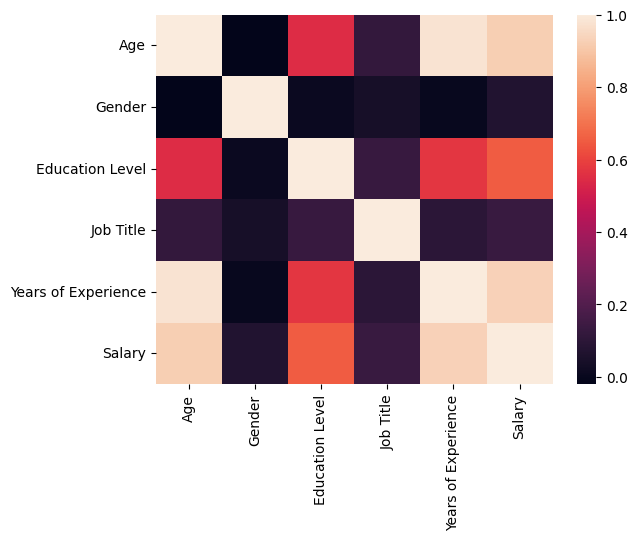

In [101]:
import seaborn as sns

correlation = df.corr()
sns.heatmap(correlation)



In [102]:
df.drop(['Age'], axis=1, inplace=True)


X_train,X_test = train_test_split(df, test_size=0.3)

y_train = X_train['Salary']
X_train = X_train.drop('Salary', axis=1)
y_test = X_test['Salary']
X_test = X_test.drop('Salary', axis=1)

In [103]:
regressor = LinearRegression().fit(X_train,y_train)


pred_y = regressor.predict(X_test)

print(f"SBK: {mean_squared_error(y_test,pred_y):.4f} ")
print(f"SBA: {mean_absolute_error(y_test,pred_y):.4f} ")
print(f"R^2: {explained_variance_score(y_test,pred_y):.4f} ")



SBK: 265117600.0204 
SBA: 11954.4928 
R^2: 0.8708 


<Axes: >

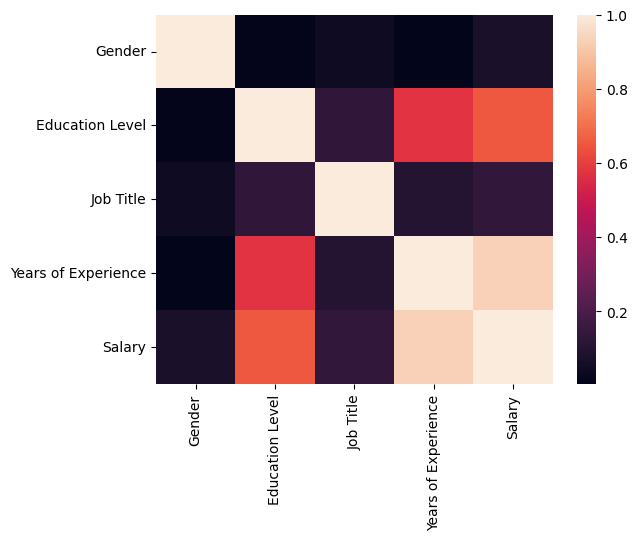

In [104]:
import seaborn as sns

correlation = df.corr()
sns.heatmap(correlation)



Zbuduj model regresji odpornej i przetestuj jego predykcje

In [105]:
from sklearn.linear_model import HuberRegressor

huber = HuberRegressor().fit(X_train,y_train)

pred_y_huber = huber.predict(X_test)

print(f"SBK: {mean_squared_error(y_test,pred_y_huber):.4f} ")
print(f"SBA: {mean_absolute_error(y_test,pred_y_huber):.4f} ")
print(f"R^2: {explained_variance_score(y_test,pred_y_huber):.4f} ")


SBK: 263838129.6784 
SBA: 11715.7307 
R^2: 0.8731 


Wykreś przewidziane i faktyczne wartości obu modeli (przykład w dokumentacji: https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_regressor.html#sphx-glr-auto-examples-ensemble-plot-voting-regressor-py)

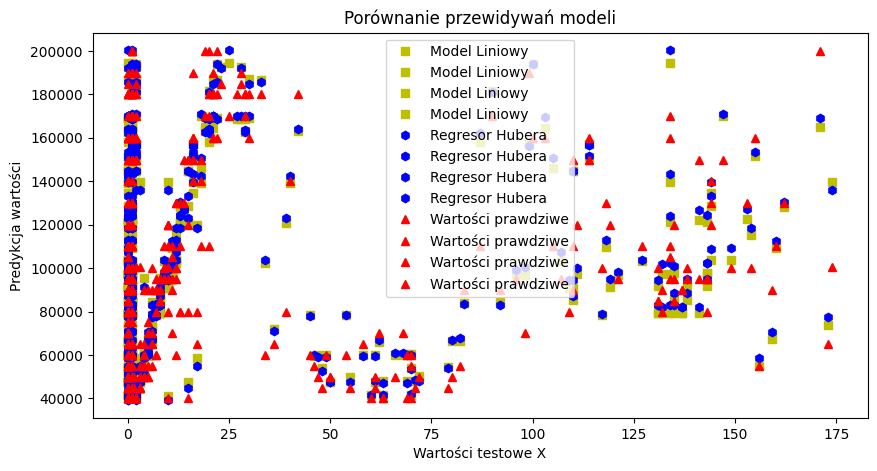

In [110]:
plt.figure(figsize=(10, 5))
plt.plot(X_test, pred_y, "ys", label="Model Liniowy")
plt.plot(X_test, pred_y_huber, "hb", label="Regresor Hubera")
plt.plot(X_test, y_test, "r^", label="Wartości prawdziwe")


plt.ylabel("Predykcja wartości")
plt.xlabel("Wartości testowe X")
plt.legend(loc="best")
plt.title("Porównanie przewidywań modeli")

plt.show()

Zmodyfikuj kod, zeby zwizualizować wynik lepszego z modeli

IndexError: index 172 is out of bounds for axis 0 with size 113

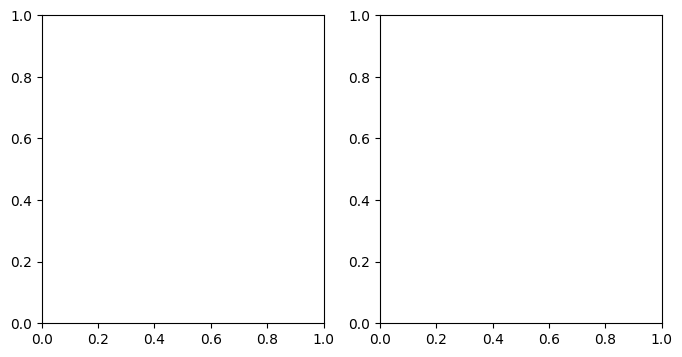

In [90]:
import matplotlib.pyplot as plt

from sklearn.metrics import PredictionErrorDisplay

fig, axs = plt.subplots(ncols=2, figsize=(8, 4))
PredictionErrorDisplay.from_predictions(
    y_train,
    y_pred=pred_y,
    kind="actual_vs_predicted",
    subsample=100,
    ax=axs[0],
    random_state=0,
)
axs[0].set_title("Actual vs. Predicted values")
PredictionErrorDisplay.from_predictions(
    y_train,
    y_pred=pred_y_huber,
    kind="residual_vs_predicted",
    subsample=100,
    ax=axs[1],
    random_state=0,
)
axs[1].set_title("Residuals vs. Predicted Values")
fig.suptitle("Plotting cross-validated predictions")
plt.tight_layout()
plt.show()